## Non-LLM Based Workflow

In [1]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [8]:
#define a simple state graph

class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str



In [9]:
def calculate_bmi(state : BMIState) ->BMIState:

    weight =state["weight_kg"]
    height =state["height_m"]

    bmi= weight/(height**2)

    state["bmi"] = round(bmi, 2)  #partial updation of the state

    return state

In [10]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    
    state["category"] = category
    return state

In [11]:
#define graph
graph = StateGraph(BMIState)  #creating of graph instance using StateGraph by passing state as its parameter

#add nodes to your graph
graph.add_node("Calculate_BMI", calculate_bmi) #name of the node and function to be executed
graph.add_node('label_BMI', label_bmi)

#add edges to the graph
graph.add_edge(START,"Calculate_BMI")
graph.add_edge("Calculate_BMI", "label_BMI")
graph.add_edge("label_BMI", END)


#compile the graph
workflow = graph.compile() #storing compiled graph in workflow variable


In [13]:
# execute the graph
initial_state = {"weight_kg": 90, "height_m": 1.75} #input state
final_state = workflow.invoke(initial_state)

print(final_state)


{'weight_kg': 90, 'height_m': 1.75, 'bmi': 29.39, 'category': 'Overweight'}


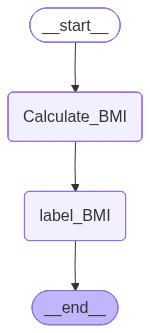

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())